<a href="https://colab.research.google.com/github/hitesh-lalwanii/Airline-Passenger-Referral-Prediction-/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual ( Hitesh Lalwani )






# **Project Summary -**

This project analyzes airline reviews from 2006 to 2019 to predict if passengers will recommend the airline. The dataset includes structured responses and free-text comments. The goal is to combine Exploratory Data Analysis (EDA) and Machine Learning (ML) classification to achieve accurate predictions.

# **GitHub Link -**

https://github.com/hitesh-lalwanii/Airline-Passenger-Referral-Prediction-

# **Problem Statement**


### Problem Statement

The goal of this project is to predict whether a passenger would recommend an airline based on various factors such as overall rating, traveler type, cabin service, food and beverage quality, ground service, and value for money. Using a dataset of airline reviews from 2006 to 2019, we aim to build a machine learning model that accurately identifies key determinants of customer satisfaction and provides actionable insights for improving airline services.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [34]:
# Load Dataset
data=pd.read_excel("/content/data_airline_reviews.xlsx")
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
data.shape

(131895, 17)

### Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
data.duplicated().sum()

70711

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df=data.isna().sum()
df

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

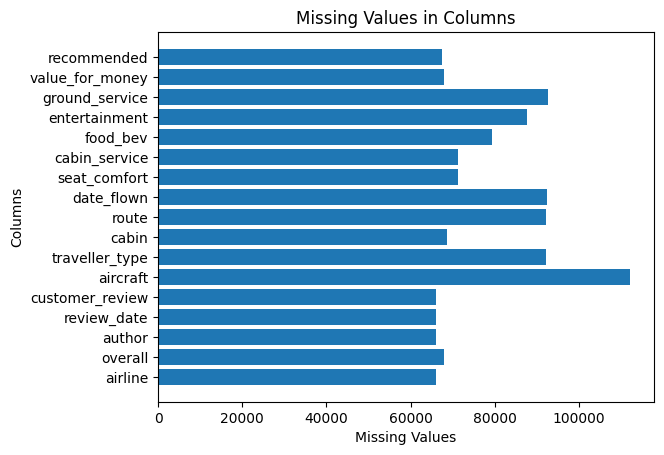

In [16]:
# Visualizing the missing values
x=df.index
y=df.values
plt.barh(x,y)
plt.xlabel("Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values in Columns")
plt.show()

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [18]:
# Dataset Describe
data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

airline: Name of the airline (Categorical).
overall: Overall rating (1-10).
author: Reviewer identifier (Categorical).
reviewdate: Review date (YYYY-MM-DD).
aircraft: Type of aircraft (Categorical).
flight date: Flight date (YYYY-MM-DD).
traveller type: Type of traveler (Categorical).
cabin service: Cabin service rating (1-10).
food bev: Food and beverage rating (1-10).
ground service: Ground service rating (1-10).
value for money: Value for money rating (1-10).
recommended: Recommendation status (Yes/No).

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
data.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# Write your code to make your dataset analysis ready.
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13189 entries, 7 to 131712
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13189 non-null  object 
 1   overall          13189 non-null  float64
 2   author           13189 non-null  object 
 3   review_date      13189 non-null  object 
 4   customer_review  13189 non-null  object 
 5   aircraft         13189 non-null  object 
 6   traveller_type   13189 non-null  object 
 7   cabin            13189 non-null  object 
 8   route            13189 non-null  object 
 9   date_flown       13189 non-null  object 
 10  seat_comfort     13189 non-null  float64
 11  cabin_service    13189 non-null  float64
 12  food_bev         13189 non-null  float64
 13  entertainment    13189 non-null  float64
 14  ground_service   13189 non-null  float64
 15  value_for_money  13189 non-null  float64
 16  recommended      13189 non-null  object 
dtypes: float64(7), o

In [36]:
data=data.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
data.head()


,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,2.0,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,6.0,A320 / Boeing 737,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,1.0,A320 / A330,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,2.0,Boeing 777-300,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no


<Axes: >

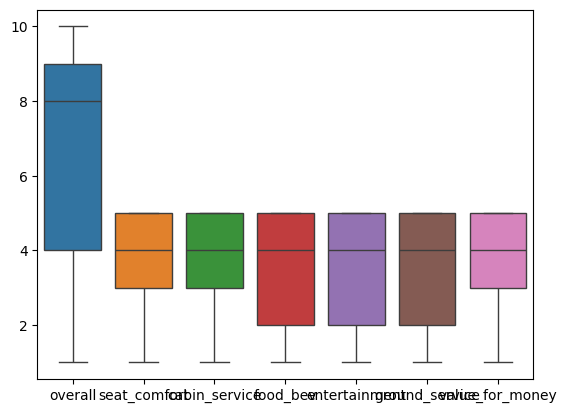

In [25]:
sns.boxplot(data=data)

WE have found that there are no outliers. So we don't need to treat any outliers.

### What all manipulations have you done and insights you found?

I have performed the following data manipulations:

Dropped null values.
Removed duplicate values.
Removed unnecessary columns.
Checked for outliers and found none.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Top 6 most frequently used Aircraft

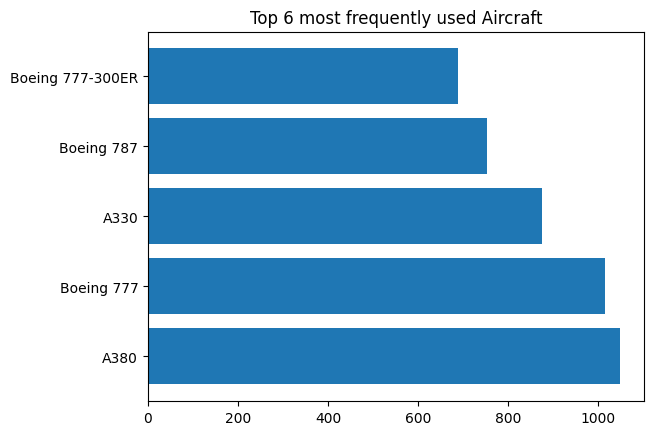

In [44]:
# Chart - 1 Top 6 most frequently used Aircraft
df=data["aircraft"].value_counts()
df=df.sort_values(ascending=False)
df=df.head(5)
x=df.index.astype(str)
y=df.values
plt.barh(x,y)
plt.title("Top 6 most frequently used Aircraft")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar horizontal chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that A380 Aircraft is most frequently used Aircraft among all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As A380 Aircraft is most frequently used Company can try to give more good service, entertainment quality, food quality as maximum as possible.

#### Chart - 2 Traveller Type Count

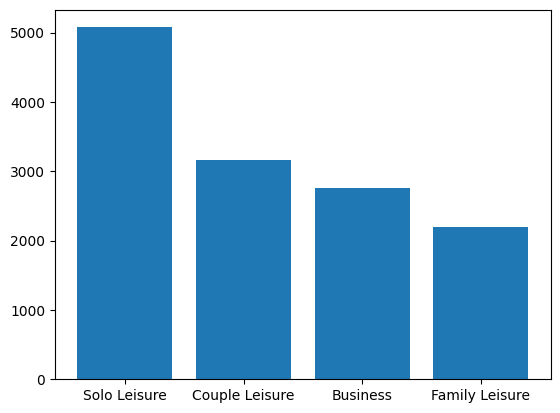

In [45]:
# Chart - 2 visualization code
df=data["traveller_type"].value_counts()
x=df.index.astype(str)
y=df.values
plt.bar(x,y)
plt.title("Traveller Type Count")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that Solo Travellers  are more likely to travel through Aircraft among all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should give more benefits to Solo Travellers so they can come often this will lead to more business to Airline Company.

#### Chart - 3 Cabin Count


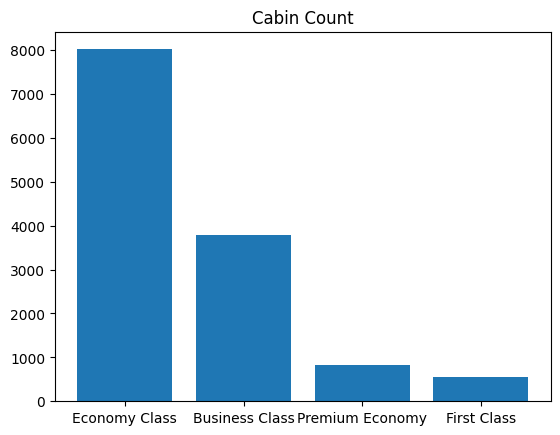

In [47]:
# Chart - 3 visualization code
df=data["cabin"].value_counts()
x=df.index.astype(str)
y=df.values
plt.bar(x,y)
plt.title("Cabin Count")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that  Travellers preffer Economy Class More as compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the cabin count chart help improve customer satisfaction, target marketing effectively, and allocate resources efficiently.

#### Chart - 4 Cabin V/S Overall Rating

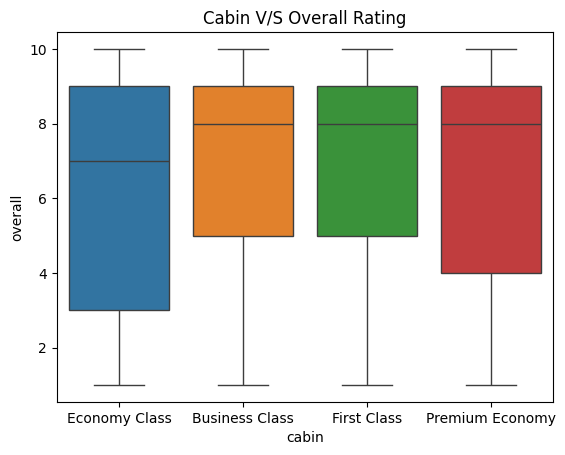

In [54]:
# Chart - 4 visualization code
sns.boxplot(data=data,x="cabin",y="overall",hue="cabin")
plt.title("Cabin V/S Overall Rating")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average overall ratings of each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average Overall Rating in First Class, Business Class and Premium Economy are almost same and much more higher than Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the average overall rating of Economy Class is low this will create Negetive Impact for the future growth of Airline Companies. The person will recommend this class less. While the average overall rating of all the other 3 classes are higher which is a positive sign for a company this will leads to bring more and more customers into these classes in future.

#### Chart - 5  Seat Comfort in each cabin

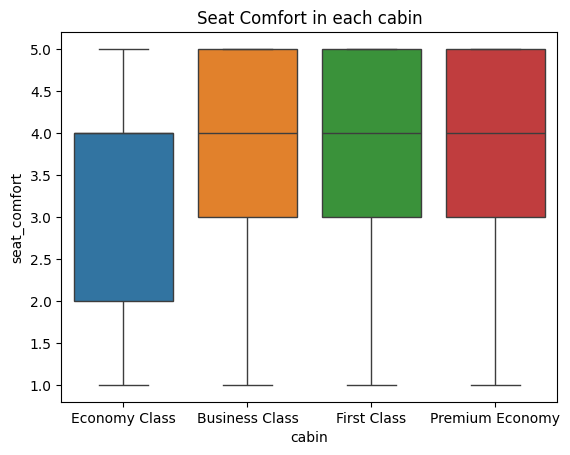

In [57]:
# Chart - 5 visualization code
sns.boxplot(data=data,x="cabin",y="seat_comfort",hue="cabin")
plt.title("Seat Comfort in each cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average seat comfort ratings of each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average seat comfort Rating in First Class, Business Class and Premium Economy are almost same and much more higher than Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights show high seat comfort ratings in premium classes, guiding investments to maintain or enhance comfort in these classes and improving Economy Class comfort to boost overall customer satisfaction.Neglecting Economy Class improvements due to lower ratings can lead to customer dissatisfaction and loss of budget-conscious travelers, negatively impacting growth.







#### Chart - 6 Cabin V/S Cabin Service

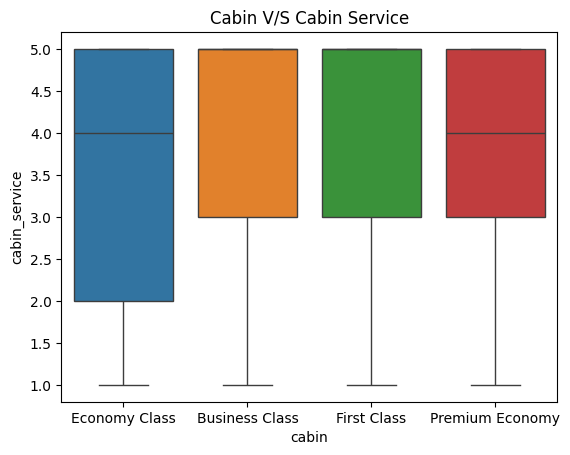

In [58]:
# Chart - 6 visualization code
sns.boxplot(data=data,x="cabin",y="cabin_service",hue="cabin")
plt.title("Cabin V/S Cabin Service")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average rationgs of cabin service in each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average cabin service rating is almost similar in each cabin.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistent cabin service ratings across all classes suggest a uniformly good service standard, which can enhance overall customer satisfaction.If service ratings are uniformly low, it indicates a need for improvement across all classes to avoid customer dissatisfaction and potential negative impact on growth.

#### Chart - 7 Food Bev In Each Cabin

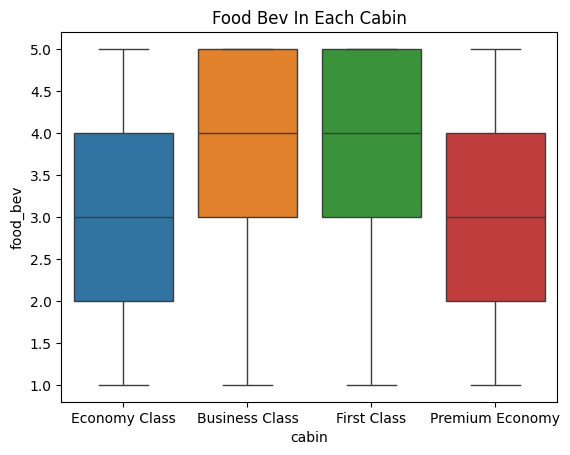

In [59]:
# Chart - 7 visualization code
sns.boxplot(data=data,x="cabin",y="food_bev",hue="cabin")
plt.title("Food Bev In Each Cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average ratings of Food in each cabin

##### 2. What is/are the insight(s) found from the chart?



```

```

I found that Average foood Rating in First Class and Business Class are higher than Economy Class and Premium Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher food ratings in First and Business Class highlight strengths in premium services, guiding improvements in Economy and Premium Economy to enhance overall customer satisfaction.Lower food ratings in Economy and Premium Economy could lead to dissatisfaction among budget-conscious travelers, potentially impacting customer retention and growth.

#### Chart - 8 Entertainment in each cabin

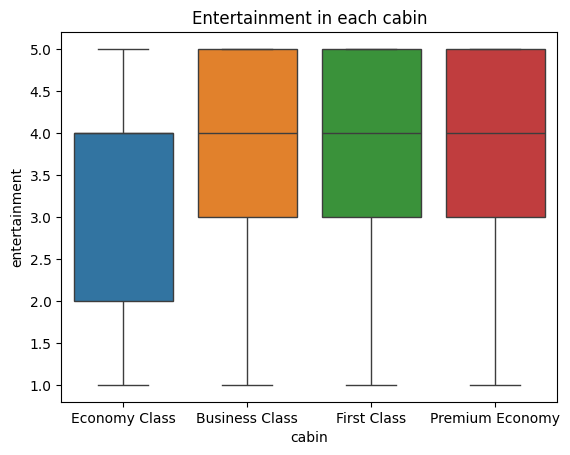

In [60]:
# Chart - 8 visualization code
sns.boxplot(data=data,x="cabin",y="entertainment",hue="cabin")
plt.title("Entertainment in each cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average entertainment ratings in each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average entertainment Rating in First Class, Business Class and Premium Economy are almost same and much more higher than Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High entertainment ratings across premium classes indicate consistent service quality, guiding investments to maintain this standard and potentially attract more customers to premium services.Lower entertainment ratings in Economy Class may lead to dissatisfaction among passengers, affecting customer retention and potentially hindering growth. Investing in improving Economy Class entertainment could mitigate this risk.

#### Chart - 9 Ground Service in each Cabin

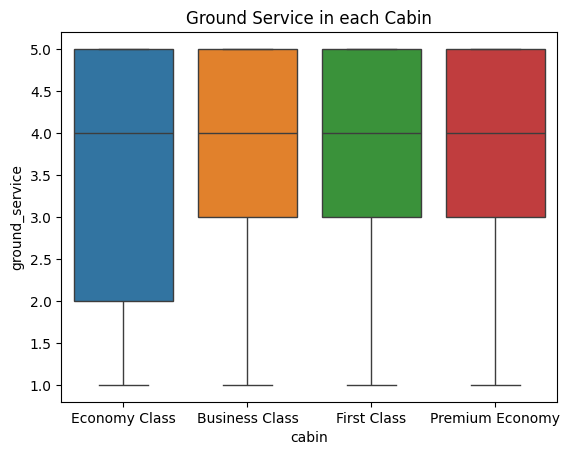

In [61]:
# Chart - 9 visualization code
sns.boxplot(data=data,x="cabin",y="ground_service",hue="cabin")
plt.title("Ground Service in each Cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average ground service ratings in each cabin






##### 2. What is/are the insight(s) found from the chart?

I found that Average ground service Rating in all class are almost same. But some of the travellers gave lower ground service rating in economy class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistently high ground service ratings across classes indicate a strong service standard, which can contribute to overall customer satisfaction and loyalty. Lower ground service ratings from some Economy Class travelers suggest a need for targeted improvements in ground services for this segment to prevent potential dissatisfaction and negative impact on growth.







#### Chart - 10 - Correlation Heatmap

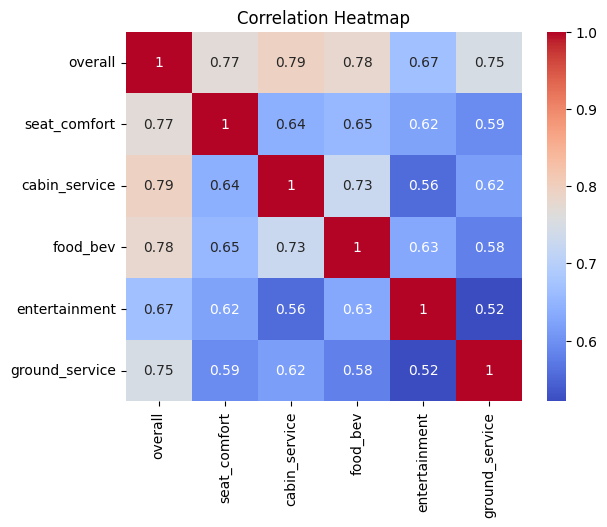

In [65]:
# Correlation Heatmap visualization code
continous_col=["overall","seat_comfort","cabin_service","food_bev","entertainment","ground_service"]
data_continous = data[continous_col]
corr_matrix = data_continous.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

 I have choosen Heatmap chart because I need to find the co relation between 2 or more continous variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***